<a href="https://colab.research.google.com/github/IndraMadika/ML_Study/blob/main/Data_Preprocessing_part_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [11]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.57G/3.58G [00:42<00:00, 130MB/s]
100% 3.58G/3.58G [00:42<00:00, 89.7MB/s]


In [13]:

import zipfile

local_dataset_zip = '/content/fruits-fresh-and-rotten-for-classification.zip'
zip_buka = zipfile.ZipFile(local_dataset_zip, 'r')
zip_buka.extractall('/content')
zip_buka.close()

In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import shutil

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential, Model

In [15]:
TRAIN_PATH = '/content/dataset/train'
TEST_PATH = '/content/dataset/test'
SIZE = (240, 240)

In [16]:
labels = []
for class_ in os.listdir(TRAIN_PATH):
    labels.append(class_)
NUM_LABELS = len(labels)

print(labels)

['rottenoranges', 'freshbanana', 'rottenbanana', 'freshapples', 'freshoranges', 'rottenapples']


In [17]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split = 0.1)
test_datagen = ImageDataGenerator(rescale=1./255) 

'''
Comments:
- ImageDataGenerator will resize all images to target_size
- x_col is the column where the images' names are
- y_col is the column where the labels are
- has_ext means that the images' names include a file extension, e.g. image_name.jpg
- Here you can change the targe_size to resize all images to different shapes.
Maybe larger images help in getting a better accuracy
'''
train_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                 classes=labels,
                                                 target_size=SIZE, 
                                                 subset="training",
                                                 class_mode='categorical')

val_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=TRAIN_PATH,
                                                 shuffle=True,
                                                 classes=labels,
                                                 target_size=SIZE, 
                                                 subset="validation",
                                                 class_mode='categorical')

Found 9813 images belonging to 6 classes.
Found 1088 images belonging to 6 classes.


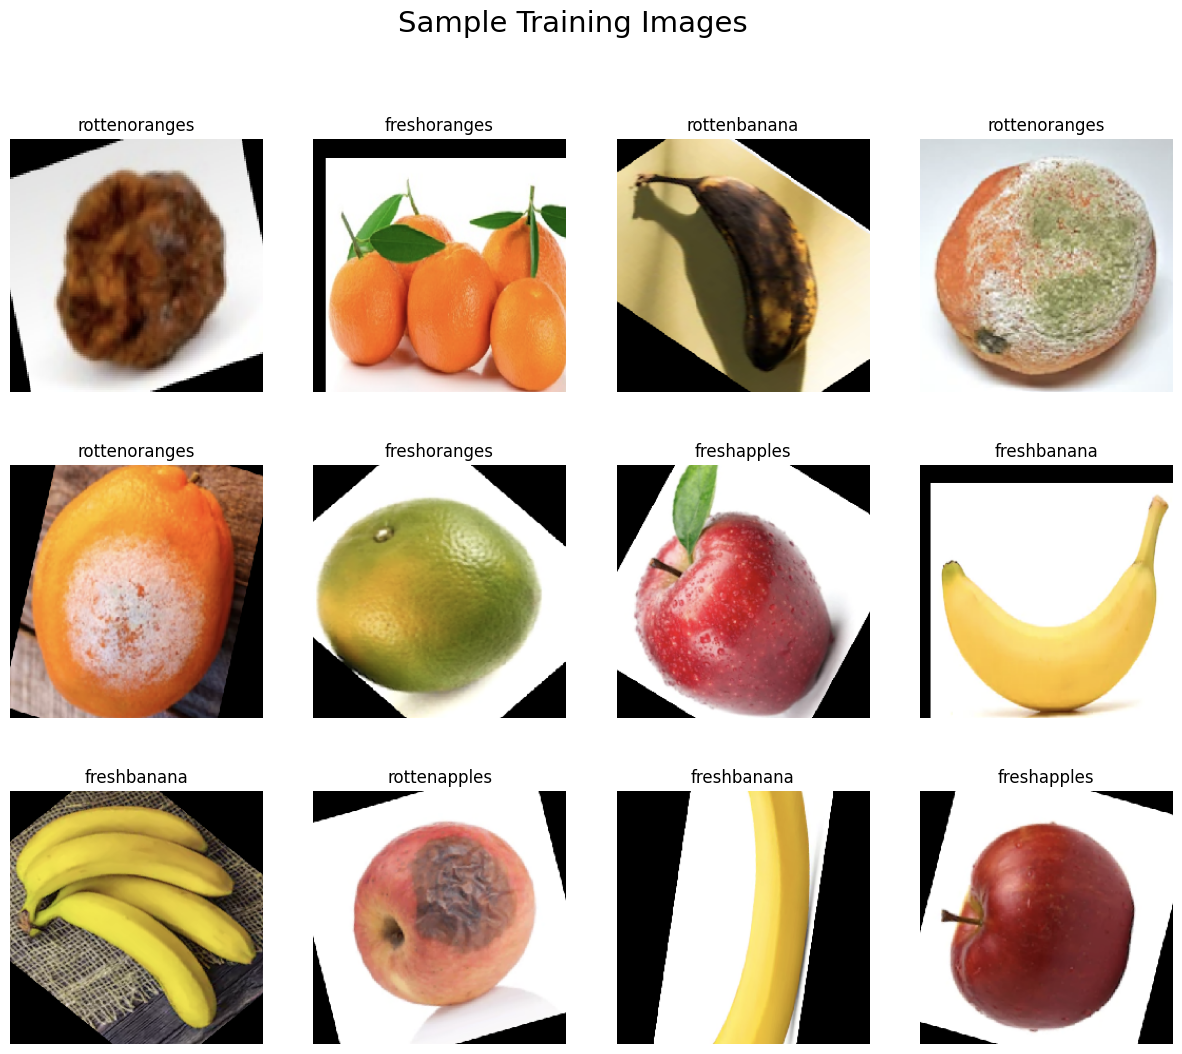

In [18]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
idx = 0

for i in range(3):
    for j in range(4):
        label = labels[np.argmax(train_dataset[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_dataset[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

# plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (240,240,3)))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

model.add(tf.keras.layers.Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 238, 238, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 119, 119, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 119, 119, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 117, 117, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 58, 58, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 58, 58, 64)        0

In [ ]:
history = model.fit_generator(generator=train_dataset, steps_per_epoch=len(train_dataset), epochs=12, validation_data=val_dataset, validation_steps=len(val_dataset))

<ipython-input-21-368c2747024e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_dataset, steps_per_epoch=len(train_dataset), epochs=12, validation_data=val_dataset, validation_steps=len(val_dataset))


Epoch 1/12
243/307 [======================>.......] - ETA: 5:03 - loss: 0.8517 - accuracy: 0.6816

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Acc','Val'], loc = 'lower right')

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss','Val'], loc = 'upper right')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(TEST_PATH,
                                                  batch_size=1,
                                                  target_size=SIZE,
                                                  shuffle = False,
                                                  classes=labels,
                                                  class_mode='categorical')


filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

In [ ]:
predictions = model.predict(test_generator)
files=test_generator.filenames
class_dict=test_generator.class_indices # a dictionary of the form class name: class index
rev_dict={}
for key, value in class_dict.items():
    rev_dict[value]=key

for i, p in enumerate(predictions):
    index=np.argmax(p)
    klass=rev_dict[index]    
    prob=p[index]
#     print('for file ', files[i], ' predicted class is ', klass,' with probability ',prob)

In [ ]:
print(len(test_generator[0][0]))
print(test_generator[0][1].shape)

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(12, 10))
idx = 0

for i in range(3):
    for j in range(4):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[idx][0].reshape(240,240,3))
        ax[i, j].axis("off")
        idx += 200

# plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [ ]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(
model, to_file='model.png', show_shapes=True, show_dtype=False,
show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)


In [ ]:
!pip install visualkeras

In [ ]:
from tensorflow.keras import layers
from collections import defaultdict
# from PIL import ImageFont
# font = ImageFont.truetype("arial.ttf", 12)
color_map = defaultdict(dict) #customize the colours
color_map[layers.Conv2D]['fill'] = '#00f5d4'
color_map[layers.MaxPooling2D]['fill'] = '#8338ec'
color_map[layers.Dropout]['fill'] = '#03045e'
color_map[layers.Dense]['fill'] = '#fb5607'
color_map[layers.Flatten]['fill'] = '#ffbe0b'
# visualkeras.layered_view(model, legend=True,color_map=color_map,scale_xy=2, scale_z=1, max_z=200)

In [ ]:
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

In [ ]:
print(true_classes)
print(class_labels)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

In [ ]:
print('Confusion Matrix')
# print(confusion_matrix(test_generator.classes, predicted_classes))
cm = confusion_matrix(test_generator.classes, predicted_classes)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(test_generator.classes, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap="cividis")